What to do?
1. compare std, interquartile, and co-efficient of variation(std/mean) accross GC bins
    - GC bins: divide into thirds, or compare top vs bottom 10%
   - NEEDED: THIRDS
2. Sort highest and lowest GC's (10%) into bins
    - a) look at a sampling of each for obvious trends
    - b) violin plots with spearmen's on y axis. Should expect to see bi-modal at -1,1 or fat bulge at 0.
3. Analysis, analysis, analysis
4. obtain phastcon conservation scores for every gene.
    - How?
        - Google 'obtaining phastcon conservation score for every gene in the human gene'
        - talk to margaret about bed files
        - can use venv on python on fiji
        

## Moving forward:
Needs before start: bin as thirds. 

Quick outline:
    1. Started by recreating Mary's data
    1. Started by binning lowest/highest 10% and examining by eye.
    2. Distrubtion
    3. co-variance. 
        - is this the best measure? How can i know control to know that trends in co-variance are not just trends in lfpkm?
    4. spearman's
       - controls

## 0. create df2 for mean_MD and mean_lfpkm
### AND SAVE IT

In [ ]:
print (df)

In [ ]:
import seaborn
import pandas as pd
import pandas
import glob
import numpy
import re
import matplotlib.pyplot as plt

# nix that pesky # of figures error
plt.rcParams.update({'figure.max_open_warning': 0})

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/' # test

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# GC text file here
GCpath = '/home/archie/code/DnA/data/metadata/gcrichdic.txt'

# Create dataframe for mean MD, and mean fpkm
df2 = pd.DataFrame(columns=['Title','mean_MD','mean_lfpkm', 'std_lfpkm', 'co_var_lfpkm', 'IQR', 'spearman', 'pearson', 'kendall'])

# Main
count = 1
for filepath in glob.iglob(data_dir + "/HO*.tsv"):
  # Parse
    fields = ['non-promoterbi_MD', 'max_exp_of_TF', 'numtotalbi', 'SRR', 'max_exp_isoform' ]
    df = pd.read_csv(filepath, sep='\t', usecols=fields)
    for i in range(0, (len(df['non-promoterbi_MD']))):
        if (df.loc[i, 'numtotalbi'] < 5000):
            df = df.drop([i])
  # Get Gene Title
    regexp = "\/(?:HO_)(.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
    regexp1 = "\/(?:HO_)(.*)(?:_.*)\." 
    regexp2 = "\/(?:HO_)(?:.*)(?:_.*)(.[A-Z])\."
    r1 = re.findall(regexp1, filepath)[0]
    r2 = re.findall(regexp2, filepath)[0]
    Gene = (r1 +  r2)
  # Calculate and store stats
    mean_MD = round(df['non-promoterbi_MD'].mean(), 5)
    mean_lfpkm = round(df['max_exp_of_TF'].mean(), 5)
    std_lfpkm = round(df['max_exp_of_TF'].std(), 5)
    co_var_lfpkm = (std_lfpkm / mean_lfpkm)
    Q1 = df['max_exp_of_TF'].quantile(0.25)
    Q3 = df['max_exp_of_TF'].quantile(0.75)
    IQR = (Q3 - Q1)
    spearman = df['non-promoterbi_MD'].corr(df['max_exp_of_TF'], method='spearman')
    pearson = df['non-promoterbi_MD'].corr(df['max_exp_of_TF'])
    kendall = df['non-promoterbi_MD'].corr(df['max_exp_of_TF'], method='kendall')
    df2.loc[Gene] = [Title, mean_MD, mean_lfpkm, std_lfpkm, co_var_lfpkm, IQR, spearman, pearson, kendall]
    
    

#parse GC.text +  combine
GC = pandas.read_csv(GCpath, sep='\t')
GC.columns = ['Title', 'GC']
df3 = pandas.merge(GC, df2, on='Title', how='outer')

#df3 = df2.sort_values('GC')
#df3['10qcut'] = pd.qcut(df3['GC'], 10)
#df3['10cut'] = pd.cut(df3['GC'], 10)
#df3['5cut'] = pd.cut(df3['GC'], 5)
#df3['5qcut'] = pd.qcut(df3['GC'], 5)
#df3['4cut'] = pd.cut(df3['GC'], 4)
#df3['4qcut'] = pd.qcut(df3['GC'], 4)
#df3['3cut'] = pd.cut(df3['GC'], 3)
#df3['3qcut'] = pd.qcut(df3['GC'], 3)

##### DING DING DING DING DING

#Save df2 as csv
df3.to_csv(r'/home/archie/code/DnA/data/metadata/meansGC.csv')

df3 = df3.sort_values('mean_MD', ascending=True)

print ("\n\nsaved successfully\n\n")


### 0. Import means+GC, bin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pandas
import random

# df2 path here
filepath = '/home/archie/code/DnA/data/metadata/meansGC.csv' 

#parse
df = pandas.read_csv(filepath, sep=',')

# sort into baseline vs non-baseline
cutoff = 0.35
n=0
for i in range(0, (len(df['GC']))):
    if df['GC'][i] < cutoff:
        df.at[i, 'mode'] = "GC<.35"
        df.at[i, 'sample'] = "GC<.35"
        df.at[i, 'GC<.35'] = df['mean_lfpkm'][i]
    else:
        df.at[i, 'mode'] = "GC>.35"
        df.at[i, 'GC>.35'] = df['mean_lfpkm'][i]
        n += 1
        if n < 191:
            df.at[i, 'sample'] = 'GC>.35'
print ("done")

cutoff1 = 0.35
cutoff2 = .54
for i in range(0, (len(df['GC']))):
    if df['GC'][i] < cutoff1:
        df.at[i, 'model'] = "1"
        df.at[i, 'mode1'] = df['mean_lfpkm'][i]
    elif df['GC'][i] > cutoff1 and df['GC'][i] < cutoff2:
        df.at[i, 'model'] = '2'
        df.at[i, 'mode2'] = df['mean_lfpkm'][i]
    else:
        df.at[i, 'model'] = "3"
        df.at[i, 'mode3'] = df['mean_lfpkm'][i]
print ("done")




done
done


### 1. GC distrubtion over bins

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64


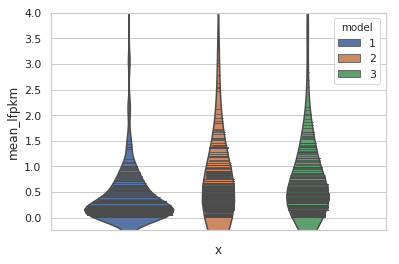

violin plot contrasting GC</>.35
 - Normalized to sample size
GC>.35    190
GC<.35    190
Name: sample, dtype: int64
GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


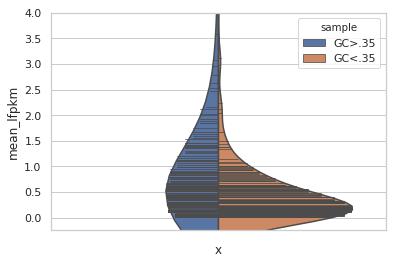

In [17]:
# Stats
amean = round(df['GC<.35'].mean(), 5)
bmean = round(df['GC>.35'].mean(), 5)
astd = round(df['GC<.35'].std(), 5)
bstd = round(df['GC>.35'].std(), 5)
amedian = round(df['GC<.35'].median(), 5)
bmedian = round(df['GC>.35'].median(), 5)

# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='mean_lfpkm', x='x', data=df, orient='v', hue='model', # split=True, \
                          inner='stick', bw=.2, scale="area")

plt.ylim(-0.25,4)
plt.show()

# overall distribution fpkm normalized to sample size
print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='mean_lfpkm', x='x', data=df, orient='v', hue='sample', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.ylim(-0.25,4)
plt.show()




## 1. STD

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64


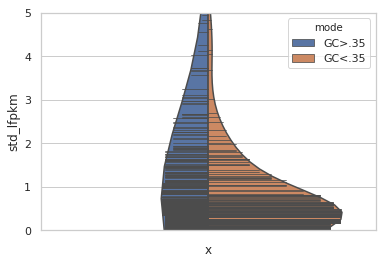

violin plot contrasting GC</>.35
 - Normalized to sample size
GC>.35    190
GC<.35    190
Name: sample, dtype: int64
GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


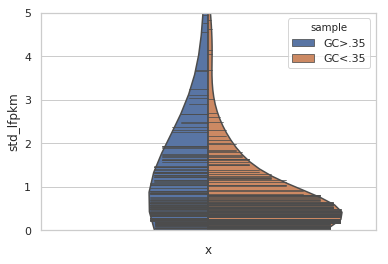

In [18]:
# Stats
amean = round(df['GC<.35'].mean(), 5)
bmean = round(df['GC>.35'].mean(), 5)
astd = round(df['GC<.35'].std(), 5)
bstd = round(df['GC>.35'].std(), 5)
amedian = round(df['GC<.35'].median(), 5)
bmedian = round(df['GC>.35'].median(), 5)

# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='std_lfpkm', x='x', data=df, orient='v', hue='mode', split=True, \
                          inner='stick', bw=.3, scale="area")

plt.ylim(0,5)
plt.show()

# overall distribution fpkm normalized to sample size
print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='std_lfpkm', x='x', data=df, orient='v', hue='sample', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.ylim(0,5)
plt.show()


## 1. Co-Var

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64


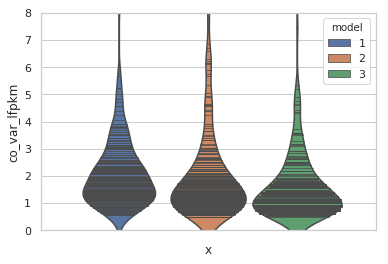

violin plot contrasting GC</>.35
 - Normalized to sample size
GC>.35    190
GC<.35    190
Name: sample, dtype: int64
GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


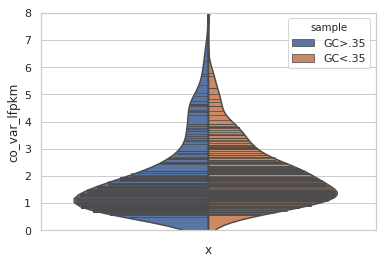

In [12]:
# Stats
amean = round(df['GC<.35'].mean(), 5)
bmean = round(df['GC>.35'].mean(), 5)
astd = round(df['GC<.35'].std(), 5)
bstd = round(df['GC>.35'].std(), 5)
amedian = round(df['GC<.35'].median(), 5)
bmedian = round(df['GC>.35'].median(), 5)

# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='co_var_lfpkm', x='x', data=df, orient='v', hue='model',  ##split=True,\
                          inner='stick', bw=.3, scale="area")

plt.ylim(0,8)
plt.show()

# overall distribution fpkm normalized to sample size
print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='co_var_lfpkm', x='x', data=df, orient='v', hue='sample', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.ylim(0,8)
plt.show()


### 1. IQR

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64


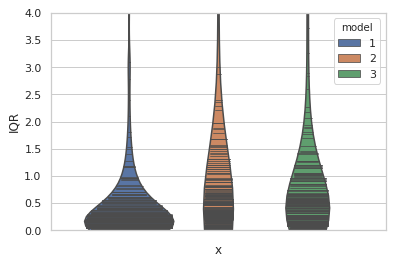

violin plot contrasting GC</>.35
 - Normalized to sample size
GC>.35    190
GC<.35    190
Name: sample, dtype: int64
GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


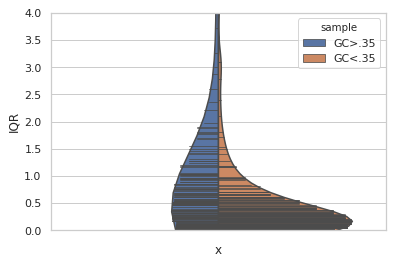

In [13]:
# Stats
amean = round(df['GC<.35'].mean(), 5)
bmean = round(df['GC>.35'].mean(), 5)
astd = round(df['GC<.35'].std(), 5)
bstd = round(df['GC>.35'].std(), 5)
amedian = round(df['GC<.35'].median(), 5)
bmedian = round(df['GC>.35'].median(), 5)

# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='IQR', x='x', data=df, orient='v', hue='model', # split=True, \
                          inner='stick', bw=.3, scale="area")

plt.ylim(0,4)
plt.show()

# overall distribution fpkm normalized to sample size
print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

plt.figure()
df['x'] = ""
fig1 = seaborn.violinplot(y='IQR', x='x', data=df, orient='v', hue='sample', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.ylim(0,4)
plt.show()

## 2a lowest and highest GC 10%


In [ ]:
df3 = df3.reset_index()
del df3['index']
for i in range (0,int((len(df3['GC']))/10)):
    print ("Bottom 10%")
    print (df3['Title'][i])
    print (df3['GC'][i])
    print ("\n\n")
df3 = df3.sort_values('GC', ascending=True)
for i in range (1,int((len(df3['GC']))/10)):
    print ("Bottom 10%")
    print (df3['Title'][i])
    print (df3['GC'][i])
    print ("\n\n")
print (df3)

### Spearman

violin plot contrasting GC</>.35

2    256
3    195
1    190
Name: model, dtype: int64
GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733
 mean GC: 0.5091147849462365


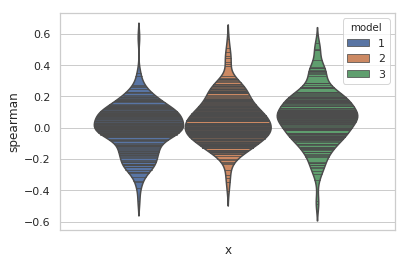

controls 


all points combined
spearman


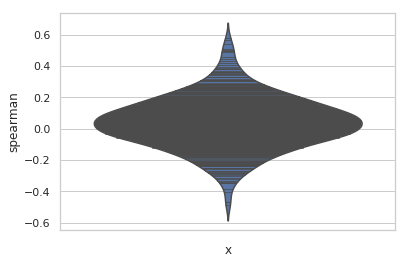



190 randomly sampled



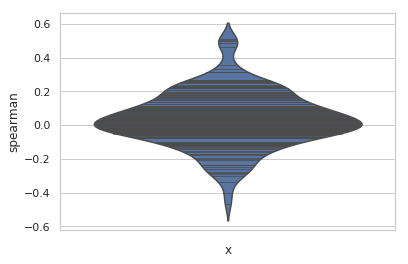

In [8]:
seaborn.set(style="whitegrid")


# Stats
amean = round(df['GC<.35'].mean(), 5)
bmean = round(df['GC>.35'].mean(), 5)
astd = round(df['GC<.35'].std(), 5)
bstd = round(df['GC>.35'].std(), 5)
amedian = round(df['GC<.35'].median(), 5)
bmedian = round(df['GC>.35'].median(), 5)

# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['model'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
print (" mean GC: " + str(df.loc[:,"GC<.35"].mean(skipna=True)))
plt.figure()
#df3['x'] = ""
df['x'] = ''
fig1 = seaborn.violinplot(y='spearman', x='x', data=df, orient='v', hue='model', # split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()

#print ("spearman")
#plt.figure()
#df3['x'] = ""
#fig1 = seaborn.violinplot(y='spearman', x='x', data=df, orient='v', hue='sample', split=True, \
                        #  inner='stick', bw=.3, scale="area")
#plt.show()

print ("controls \n\n")
# overall distribution fpkm
print ("all points combined")
print ("spearman")
plt.figure()
#df3['x'] = ""
df['x'] = ''
fig1 = seaborn.violinplot(y='spearman', x='x', data=df, orient='v', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()

print ('\n\n190 randomly sampled\n')
sample = df.sample(n=190)
fig1 = seaborn.violinplot(y='spearman', x='x', data=sample, orient='v', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()



### CONTROLS

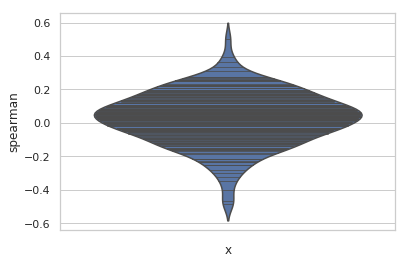

95 (1/2 population) sample of GC < .35


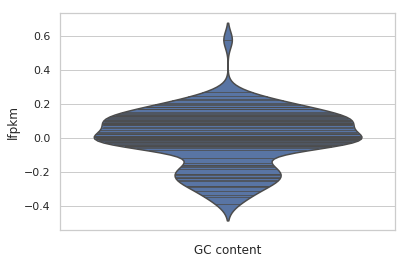

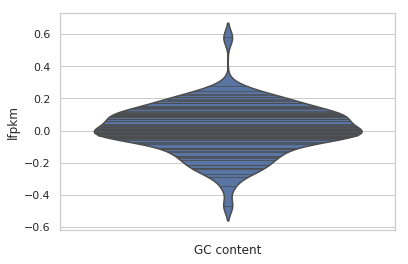

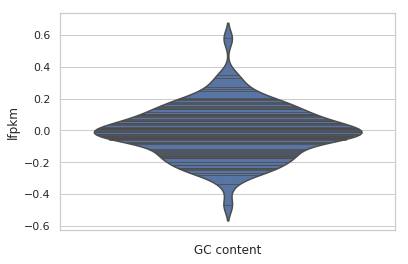

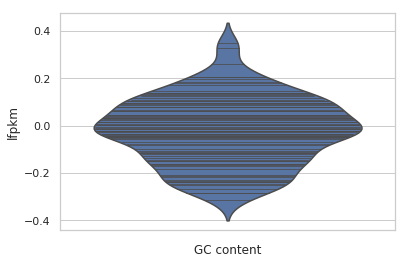

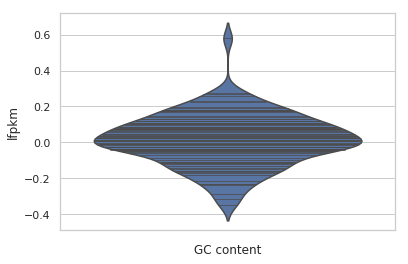

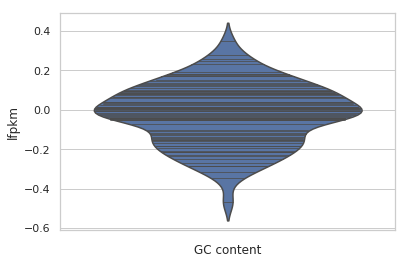

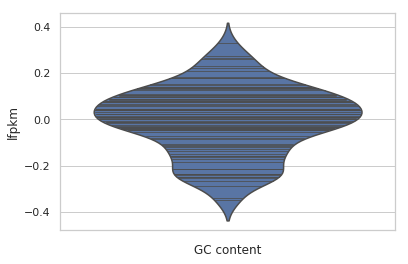

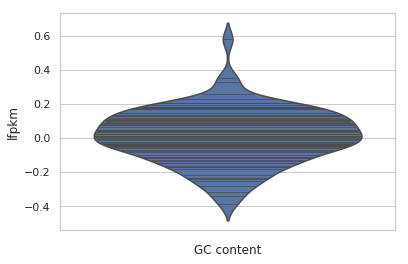

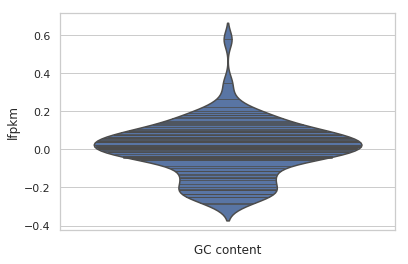

95 (1/2 population) sample of GC > .35


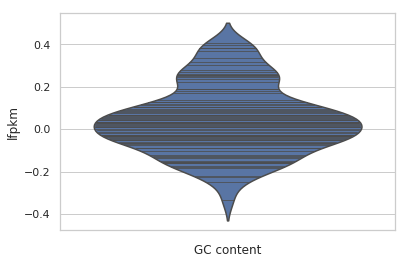

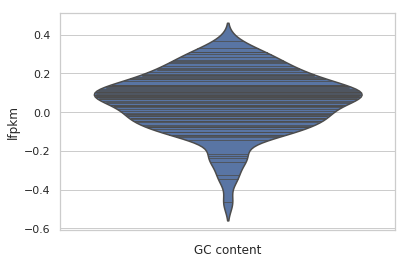

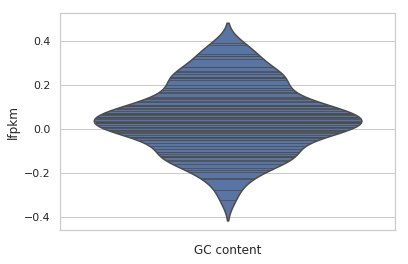

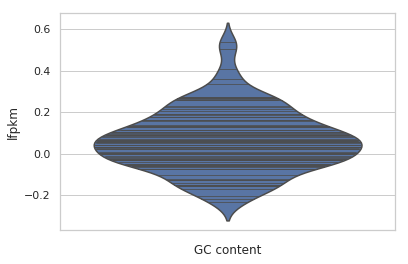

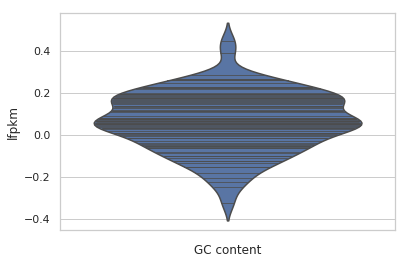

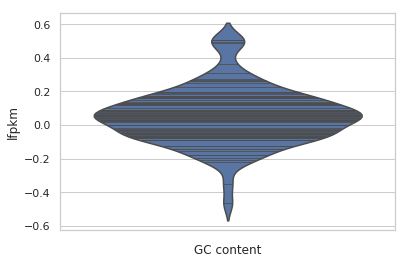

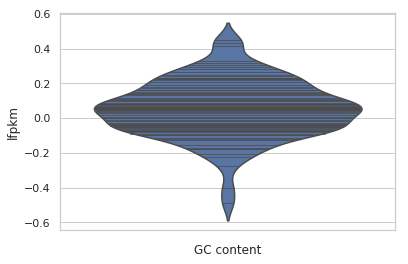

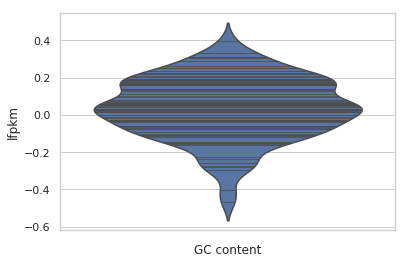

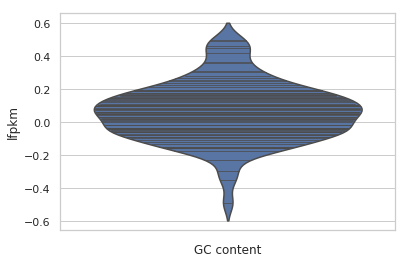

In [55]:
sample = df.sample(n=190)
fig1 = seaborn.violinplot(y='spearman', x='x', data=sample, orient='v', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()

print ("95 (1/2 population) sample of GC < .35")
for i in range(1,10):
    sample = df[df['GC'] < 0.35].sample(n=95)
    sample['x'] = ''
    fig1 = seaborn.violinplot(y='spearman', x='x', data=sample, orient='v', bw=.3, scale="width", inner='stick')
    fig1.set(xlabel="GC content", ylabel="lfpkm")
    plt.show()

print ("95 (1/2 population) sample of GC > .35")
for i in range(1,10):
    sample = df[df['GC'] > 0.35].sample(n=95)
    sample['x'] = ''
    fig1 = seaborn.violinplot(y='spearman', x='x', data=sample, orient='v', bw=.3, scale="width", inner='stick')
    fig1.set(xlabel="GC content", ylabel="lfpkm")
    plt.show()

### pearson

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64
pearson


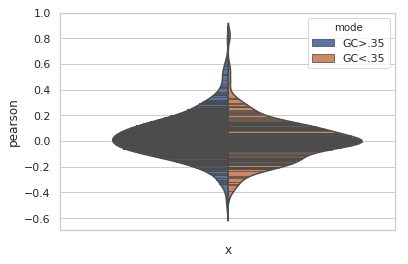

GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


In [15]:
# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
print ("pearson")
plt.figure()
df3['x'] = ""
fig1 = seaborn.violinplot(y='pearson', x='x', data=df, orient='v', hue='mode', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()

# overall distribution fpkm normalized to sample size
#print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
#print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

#print ("pearson")
#plt.figure()
#df3['x'] = ""
#fig1 = seaborn.violinplot(y='pearson', x='x', data=df, orient='v', hue='sample', split=True, \
      #                    inner='stick', bw=.3, scale="area")
#plt.show()



### Kendall

violin plot contrasting GC</>.35

GC>.35    451
GC<.35    190
Name: mode, dtype: int64
kendall


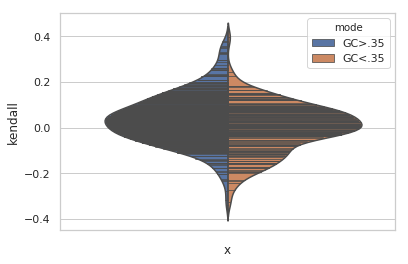

GC<.35, mean: 0.50911 median: 0.22 std: 0.86966
GC>.35, mean: 1.16508 median: 0.47483 std: 2.69733


In [61]:
# Output

# overall distribution fpkm
print ("violin plot contrasting GC</>.35\n")
print (df['mode'].value_counts())
print ("kendall")
plt.figure()
df3['x'] = ""
df['x'] = ''
fig1 = seaborn.violinplot(y='kendall', x='x', data=df, orient='v', hue='mode', split=True, \
                          inner='stick', bw=.3, scale="area")
plt.show()

# overall distribution fpkm normalized to sample size
#print ("violin plot contrasting GC</>.35\n - Normalized to sample size")
#print (df['sample'].value_counts())
print ("GC<.35, mean: " + str(amean) + " median: " + str(amedian) + " std: " + str(astd))    
print ("GC>.35, mean: " + str(bmean) + " median: " + str(bmedian) + " std: " + str(bstd))
#print (df.loc[:,"GC<.35"].mean(skipna=True))

#print ("kendall")
#plt.figure()
#df3['x'] = ""
#fig1 = seaborn.violinplot(y='kendall', x='x', data=df, orient='v', hue='sample', split=True, \
 #                         inner='stick', bw=.3, scale="area")
#plt.show()





3 qcut




3 cut




4 qcut




4 cut




5 qcut




<Figure size 432x288 with 0 Axes>

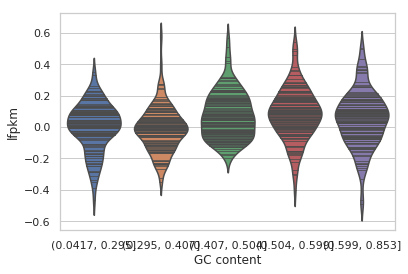

<Figure size 432x288 with 0 Axes>

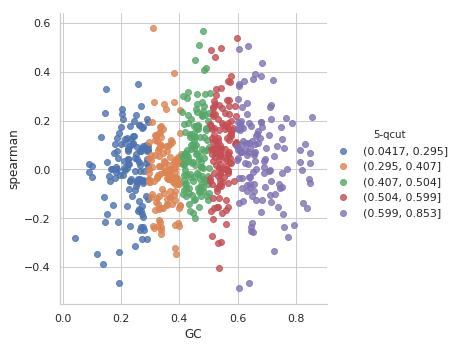



5 cut




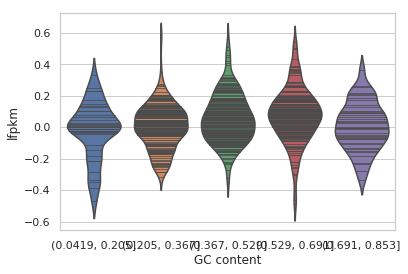

<Figure size 432x288 with 0 Axes>

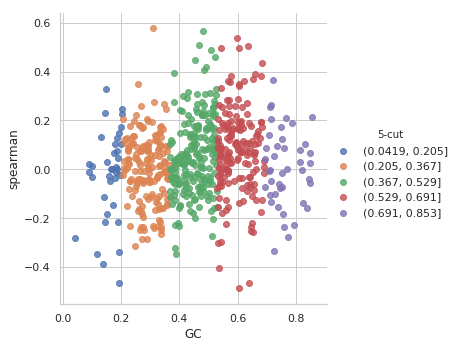



10 qcut




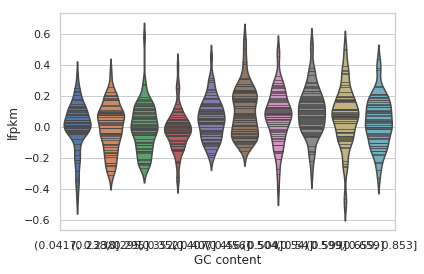

<Figure size 432x288 with 0 Axes>

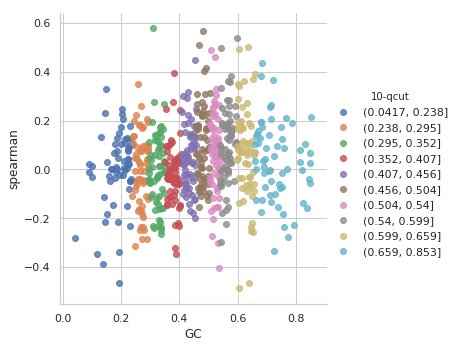



10 cut




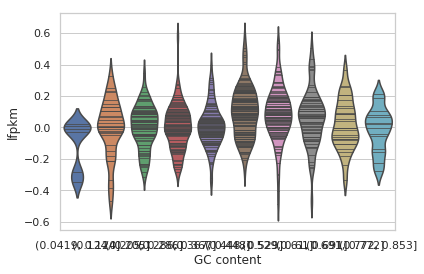

<Figure size 432x288 with 0 Axes>

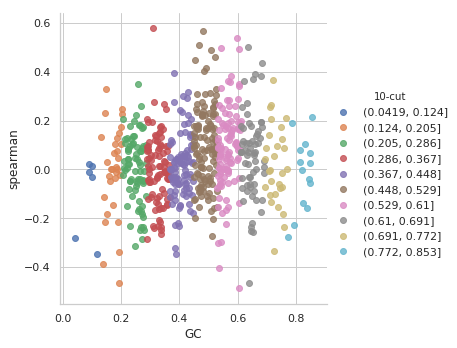



20 qcut




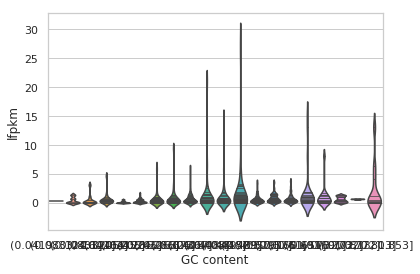

<Figure size 432x288 with 0 Axes>

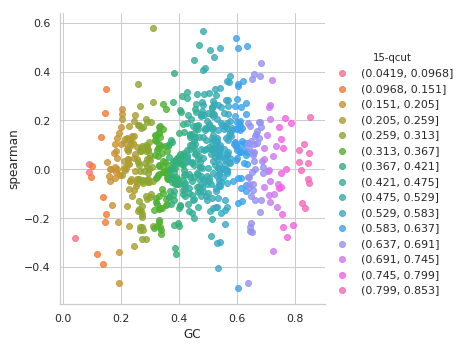

In [21]:
seaborn.set(style="whitegrid")

print ("\n\n3 qcut\n\n")


df['3-qcut'] = pd.qcut(df['GC'], 3, duplicates='drop')        
plt.figure()
#fig1 = seaborn.violinplot(y='spearman', x='3-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
#fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
#plt.show()

print ("\n\n3 cut\n\n")

df['3-cut'] = pd.qcut(df['GC'], 3, duplicates='drop')        
#plt.figure()
#fig1 = seaborn.violinplot(y='spearman', x='3-cut', data=df, orient='v', bw=.3, scale="width", inner='stick')
#fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
#plt.show()

print ("\n\n4 qcut\n\n")

df['4-qcut'] = pd.qcut(df['GC'], 4, duplicates='drop')        
#plt.figure()
#fig1 = seaborn.violinplot(y='spearman', x='4-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
#fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
#plt.show()

print ("\n\n4 cut\n\n")

df['4-cut'] = pd.qcut(df['GC'], 4, duplicates='drop')        
#plt.figure()
#fig1 = seaborn.violinplot(y='spearman', x='4-cut', data=df, orient='v', bw=.3, scale="width", inner='stick')
#fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
#plt.show()
    
print ("\n\n5 qcut\n\n")

df['5-qcut'] = pd.qcut(df['GC'], 5, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='spearman', x='5-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
plt.show()


plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='5-qcut',  data=df, fit_reg=False) 
plt.show()

print ("\n\n5 cut\n\n")

df['5-cut'] = pd.cut(df['GC'], 5, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='spearman', x='5-cut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
plt.show()

plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='5-cut',  data=df, fit_reg=False) 
plt.show()

print ("\n\n10 qcut\n\n")

df['10-qcut'] = pd.qcut(df['GC'], 10, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='spearman', x='10-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
plt.show()

plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='10-qcut',  data=df, fit_reg=False) 
plt.show()

print ("\n\n10 cut\n\n")

df['10-cut'] = pd.cut(df['GC'], 10, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='spearman', x='10-cut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
#plt.ylim(0,0.4)
plt.show()

plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='10-cut',  data=df, fit_reg=False) 
plt.show()

print ("\n\n20 qcut\n\n")

df['15-qcut'] = pd.cut(df['GC'], 15, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='mean_lfpkm', x='20-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
plt.ylim(0,0.5)
plt.show()

plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='15-qcut',  data=df, fit_reg=False) 
plt.show()
    

### backup 

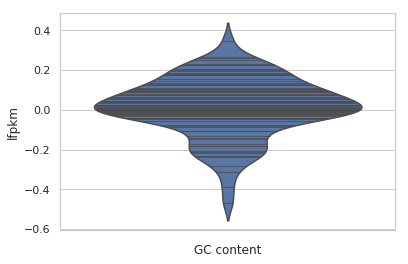

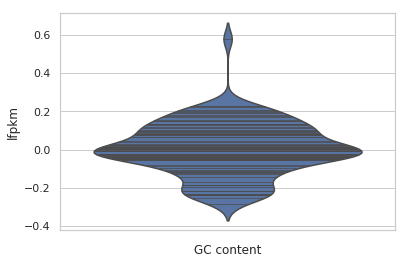

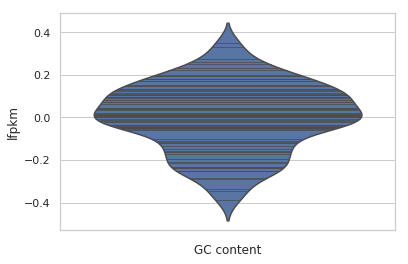

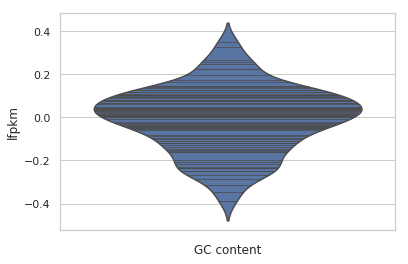

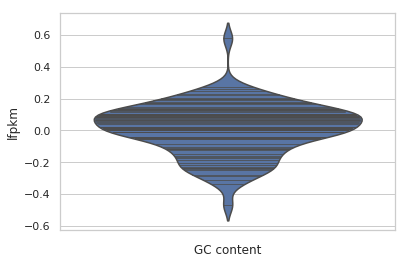

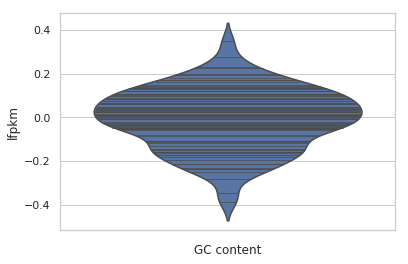

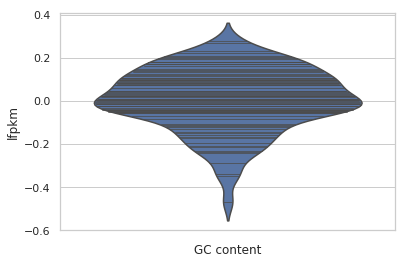

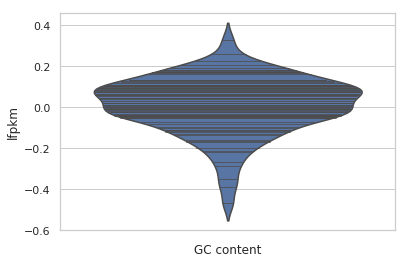

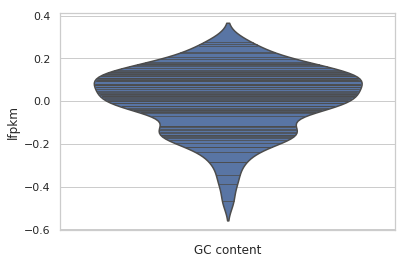

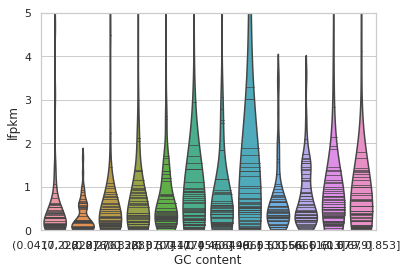

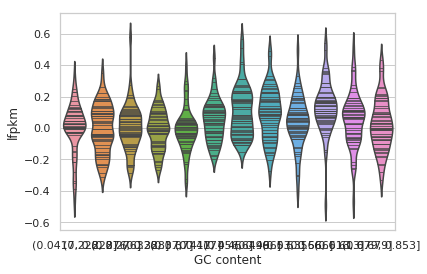

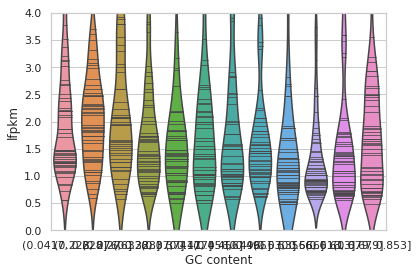

<Figure size 432x288 with 0 Axes>

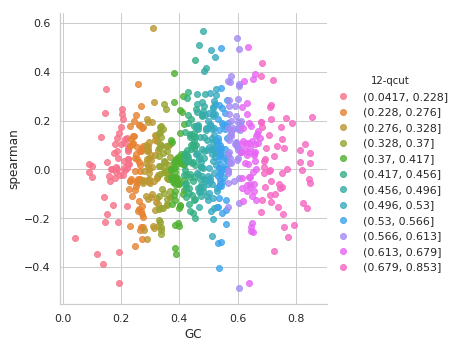

In [28]:
df['12-qcut'] = pd.qcut(df['GC'], 12, duplicates='drop')        
plt.figure()
fig1 = seaborn.violinplot(y='mean_lfpkm', x='12-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")
plt.ylim(0,5)
plt.show()
  
plt.figure()
fig1 = seaborn.violinplot(y='spearman', x='12-qcut', data=df, orient='v', bw=.3, scale="width", inner='stick')
fig1.set(xlabel="GC content", ylabel="lfpkm")

plt.show()
  
plt.figure()
seaborn.lmplot( y="spearman", x="GC", hue='12-qcut',  data=df, fit_reg=False) 
plt.show()